In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from dotenv import load_dotenv
from pandas.plotting import parallel_coordinates
import importlib
import plotly.express as px
import os
import glob
import pandas as pd
import json

import utils.db_tools as db_tools
from utils.db_tools import (
    get_db,
    filter_df,
    make_animation,
    get_data,
    metrics_grid,
    plot_grid,
    compute_metrics,
    plot_all_trajectories
)

from classify import classify_trajectories

importlib.reload(db_tools)

<module 'utils.db_tools' from '/cluster/home/vogtva/pde-solvers-cuda/analysis/utils/db_tools.py'>

In [2]:
model = "bruss"
run_id = "phase_transition"
load_dotenv()
data_dir = os.getenv("DATA_DIR")
output_dir = os.getenv("OUT_DIR")

output_dir = os.path.join(output_dir, model, run_id)
df = pd.read_csv(os.path.join(output_dir, "classification_metrics.csv"))
df_class = classify_trajectories(df)
df = df_class.copy()
# df = df[df["filename"].apply(os.path.exists)].reset_index(drop=True)
df["op"] = df["original_point"].astype(str)
df["original_point"] = df["original_point"].apply(lambda x: json.loads(x.replace("'", "\"")))

FileNotFoundError: [Errno 2] No such file or directory: '/cluster/scratch/vogtva/out/bruss/phase_transition/classification_metrics.csv'

op =  {'A': 1.0, 'B': 2.0, 'Du': 3.0, 'Dv': 33.0}


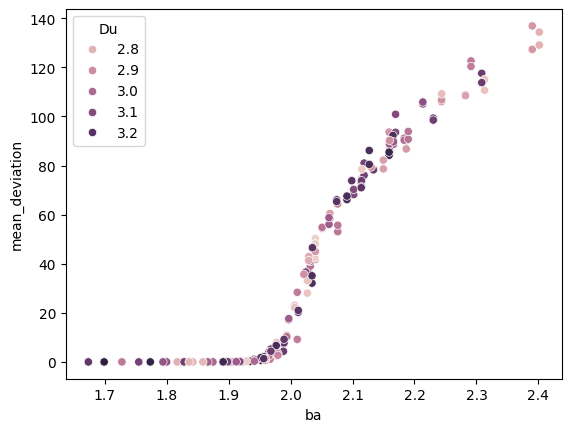

op =  {'A': 1.0, 'B': 2.0, 'Du': 1.0, 'Dv': 11.0}


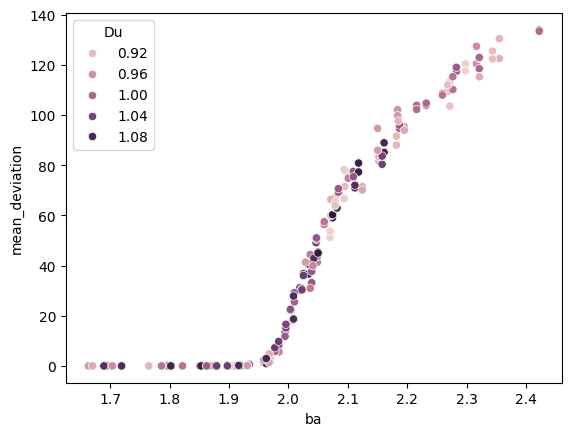

op =  {'A': 1.0, 'B': 2.0, 'Du': 3.0, 'Dv': 12.0}


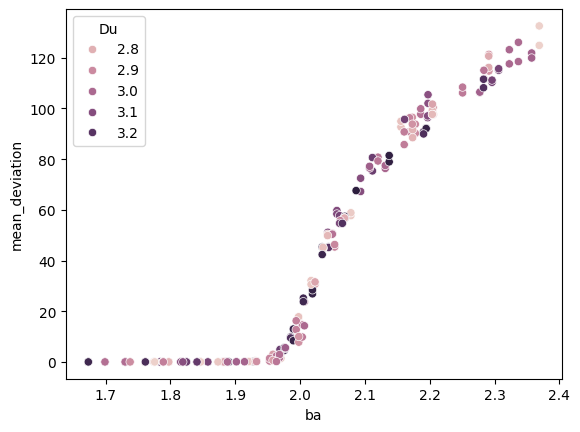

op =  {'A': 1.5, 'B': 3.0, 'Du': 3.0, 'Dv': 33.0}


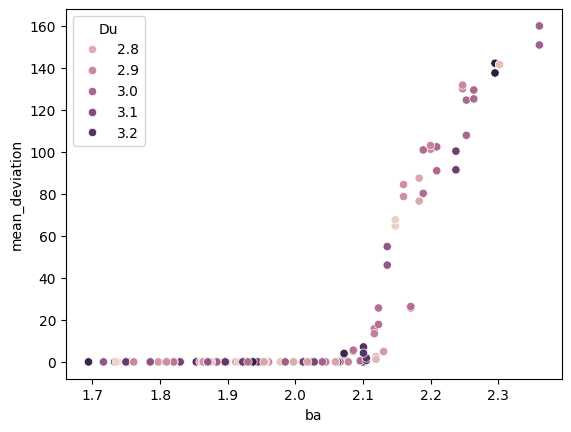

op =  {'A': 1.5, 'B': 3.0, 'Du': 3.0, 'Dv': 54.0}


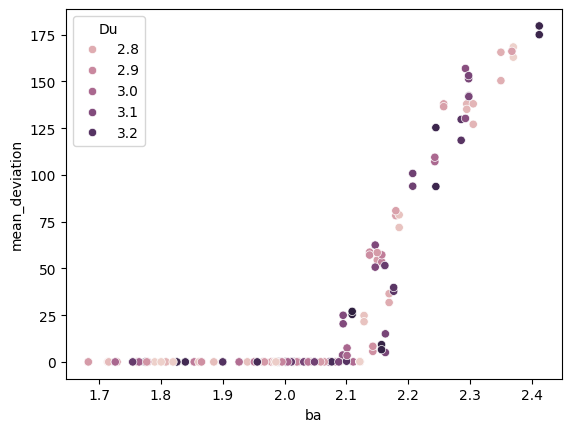

In [17]:
for op in df["op"].unique():
    print("op = ", op)
    df_filt = df[df.op == op]
    df_filt = df_filt.copy()
    df_filt.loc[:, "ba"] = df_filt["B"] / df_filt["A"]
    df_filt.loc[:, "dvdu"] = df_filt["Dv"] / df_filt["Du"]

    # fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    metric = "mean_deviation"
    sns.scatterplot(data=df_filt, x='ba', y=metric, hue="Du") #, ax=axes[0])
    # sns.scatterplot(data=df_filt, x='ba', y=metric, ax=axes[1])
    plt.show()

# df.loc[:, "ba"] = df["B"] / df["A"]
# metric = "mean_dt"
# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
# df.loc[:, "original_du"] = df["original_point"].apply(lambda x: x["Du"])

# sns.scatterplot(data=df, x='ba', y=metric, hue="Du", palette=cmap)
# plt.show()